In [5]:
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider
import matplotlib.pyplot as plt
%matplotlib inline
# Seed a random number generator
seed = 10102016 
rng = np.random.RandomState(seed)

# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = MNISTDataProvider('train', batch_size=50, rng=rng)
valid_data = MNISTDataProvider('valid', batch_size=50, rng=rng)

In [6]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdagradLearningRule
from mlp.initialisers import UniformInit
from mlp.optimisers  import Optimiser
from mlp.learning_rules import RMSpropLearningRule
input_dim, output_dim, hidden_dim = 784, 10, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])
num_epochs=100
error = CrossEntropySoftmaxError()
batch_size = 50
stats_interval = 5
init_scale = 0.01
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size
param_init = UniformInit(-init_scale, init_scale, rng=rng)

In [7]:
learning_rate=0.05
def train_model_adagrad(model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval):
    
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    optimiser = Optimiser(model, error, learning_rule, train_data, valid_data, data_monitors)
    global stats1, keys1, run_time1
    stats1, keys1, run_time1 = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)
    return stats1, keys1, run_time1
learning_rule = AdagradLearningRule(learning_rate=0.05, eps=1e-8)
_=train_model_adagrad(model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval)

Epoch 5: 1.83s to complete
    error(train)=5.15e-02, acc(train)=9.86e-01, error(valid)=8.92e-02, acc(valid)=9.73e-01
Epoch 10: 2.42s to complete
    error(train)=2.65e-02, acc(train)=9.94e-01, error(valid)=8.13e-02, acc(valid)=9.76e-01
Epoch 15: 2.15s to complete
    error(train)=1.50e-02, acc(train)=9.98e-01, error(valid)=7.88e-02, acc(valid)=9.78e-01
Epoch 20: 1.97s to complete
    error(train)=9.49e-03, acc(train)=9.99e-01, error(valid)=8.10e-02, acc(valid)=9.78e-01
Epoch 25: 1.95s to complete
    error(train)=6.45e-03, acc(train)=1.00e+00, error(valid)=8.19e-02, acc(valid)=9.78e-01
Epoch 30: 2.04s to complete
    error(train)=4.52e-03, acc(train)=1.00e+00, error(valid)=8.28e-02, acc(valid)=9.78e-01
Epoch 35: 3.10s to complete
    error(train)=3.43e-03, acc(train)=1.00e+00, error(valid)=8.49e-02, acc(valid)=9.79e-01
Epoch 40: 3.16s to complete
    error(train)=2.72e-03, acc(train)=1.00e+00, error(valid)=8.60e-02, acc(valid)=9.79e-01
Epoch 45: 1.93s to complete
    error(train)=2.26

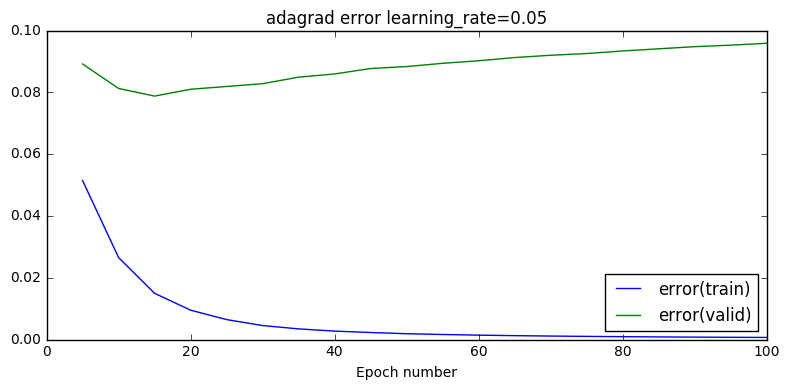

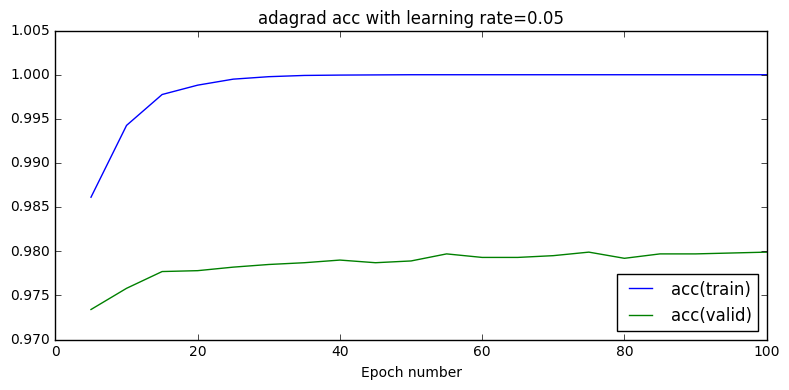

In [13]:
def plt_stats_adagrad(stats1, keys1):

    # Plot the change in the validation and training set error over training.    
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats1.shape[0]) * stats_interval, 
                  stats1[1:, keys1[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    plt.title('adagrad error learning_rate=0.05')
    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats1.shape[0]) * stats_interval, 
                  stats1[1:, keys1[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    plt.title('adagrad acc with learning rate=0.05')
    fig_1.tight_layout()
    fig_2.tight_layout()

    return fig_1, ax_1, fig_2, ax_2
_=plt_stats_adagrad(stats1,keys1)

In [14]:
learning_rate=0.05
def train_model_RMSpropLearningRule(model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval):
    
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    optimiser = Optimiser(model, error, learning_rule, train_data, valid_data, data_monitors)
    global stats2, keys2, run_time2
    stats2, keys2, run_time2 = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)
    return stats2, keys2, run_time2

num_epochs=100
error = CrossEntropySoftmaxError()
batch_size = 50
stats_interval = 5
init_scale = 0.01
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size
param_init = UniformInit(-init_scale, init_scale, rng=rng)
rng.seed(seed)
train_data.reset()
valid_data.reset()
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])
learning_rule=RMSpropLearningRule(learning_rate=0.05, eps=1e-8, decay_rate=0.9)
_=train_model_RMSpropLearningRule(model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval)

/afs/inf.ed.ac.uk/user/s16/s1669411/mlpractical/mlp/layers.py:194: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-inputs))
Epoch 5: 2.16s to complete
    error(train)=2.02e+00, acc(train)=8.84e-01, error(valid)=1.89e+00, acc(valid)=8.94e-01
Epoch 10: 2.70s to complete
    error(train)=2.36e+00, acc(train)=8.88e-01, error(valid)=2.21e+00, acc(valid)=8.94e-01
Epoch 15: 2.17s to complete
    error(train)=1.75e+00, acc(train)=9.25e-01, error(valid)=1.82e+00, acc(valid)=9.24e-01
Epoch 20: 2.18s to complete
    error(train)=1.65e+00, acc(train)=9.29e-01, error(valid)=1.64e+00, acc(valid)=9.34e-01
Epoch 25: 2.19s to complete
    error(train)=1.64e+00, acc(train)=9.31e-01, error(valid)=1.69e+00, acc(valid)=9.29e-01
Epoch 30: 2.21s to complete
    error(train)=1.43e+00, acc(train)=9.32e-01, error(valid)=1.50e+00, acc(valid)=9.31e-01
Epoch 35: 2.18s to complete
    error(train)=1.58e+00, acc(train)=9.32e-01, error(valid)=1.73e+00, acc(valid)=9.32e-01
Epoch 40: 2.29s to c

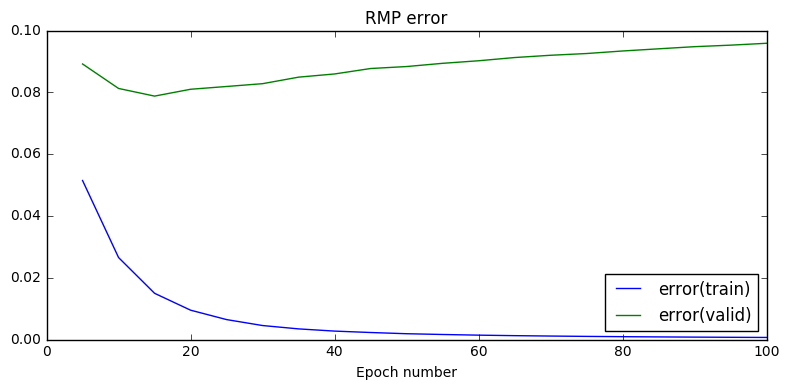

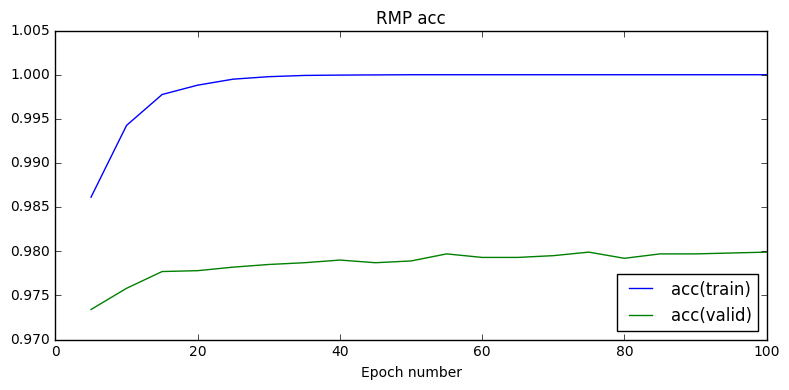

In [15]:
def plt_stats_RM(stats2, keys2):

    # Plot the change in the validation and training set error over training.    
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats1.shape[0]) * stats_interval, 
                  stats1[1:, keys1[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    plt.title('RMP error')
    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats1.shape[0]) * stats_interval, 
                  stats1[1:, keys1[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    plt.title('RMP acc')
    fig_1.tight_layout()
    fig_2.tight_layout()

    return fig_1, ax_1, fig_2, ax_2
_=plt_stats_RM(stats2,keys2)

In [16]:
def train_model_adagrad(model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval):
    
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    optimiser = Optimiser(model, error, learning_rule, train_data, valid_data, data_monitors)
    global stats3, keys3, run_time3
    stats3, keys3, run_time3 = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)
    return stats3, keys3, run_time3
num_epochs=100
error = CrossEntropySoftmaxError()
batch_size = 50
stats_interval = 5
init_scale = 0.01
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size
param_init = UniformInit(-init_scale, init_scale, rng=rng)
rng.seed(seed)
train_data.reset()
valid_data.reset()
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])


learning_rule = AdagradLearningRule(learning_rate=0.00000005, eps=1e-8)

_=train_model_adagrad(model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval)

Epoch 5: 2.23s to complete
    error(train)=2.57e+00, acc(train)=9.72e-02, error(valid)=2.57e+00, acc(valid)=9.83e-02
Epoch 10: 1.98s to complete
    error(train)=2.57e+00, acc(train)=9.72e-02, error(valid)=2.57e+00, acc(valid)=9.83e-02
Epoch 15: 2.01s to complete
    error(train)=2.57e+00, acc(train)=9.72e-02, error(valid)=2.57e+00, acc(valid)=9.83e-02
Epoch 20: 2.04s to complete
    error(train)=2.57e+00, acc(train)=9.72e-02, error(valid)=2.57e+00, acc(valid)=9.83e-02
Epoch 25: 1.99s to complete
    error(train)=2.57e+00, acc(train)=9.72e-02, error(valid)=2.57e+00, acc(valid)=9.83e-02
Epoch 30: 2.02s to complete
    error(train)=2.57e+00, acc(train)=9.72e-02, error(valid)=2.57e+00, acc(valid)=9.83e-02
Epoch 35: 2.08s to complete
    error(train)=2.57e+00, acc(train)=9.72e-02, error(valid)=2.57e+00, acc(valid)=9.83e-02
Epoch 40: 2.00s to complete
    error(train)=2.57e+00, acc(train)=9.72e-02, error(valid)=2.57e+00, acc(valid)=9.83e-02
Epoch 45: 1.98s to complete
    error(train)=2.57

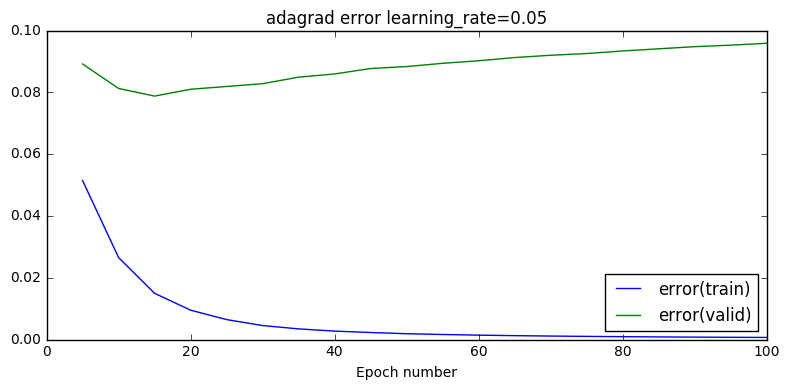

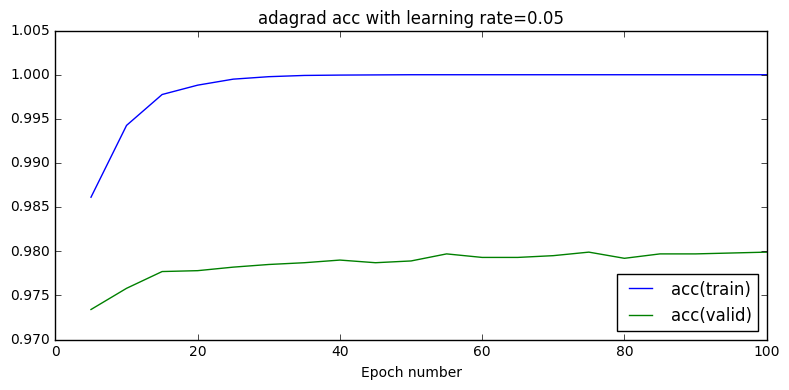

In [17]:
def plt_stats_adagrad(stats3, keys3):

    # Plot the change in the validation and training set error over training.    
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats1.shape[0]) * stats_interval, 
                  stats1[1:, keys1[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    plt.title('adagrad error learning_rate=0.05')
    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats1.shape[0]) * stats_interval, 
                  stats1[1:, keys1[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    plt.title('adagrad acc with learning rate=0.05')
    fig_1.tight_layout()
    fig_2.tight_layout()

    return fig_1, ax_1, fig_2, ax_2
_=plt_stats_adagrad(stats3,keys3)